In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
import seaborn as sns

In [2]:
data = pd.read_csv("regression_cars.csv")
data.head()

In [4]:
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data = data.dropna()

Missing Values:
 Car_ID               0
Brand                0
Model                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64


In [5]:
numerical_columns = data.select_dtypes(include=['int', 'float']).columns
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])
data.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,-1.714816,Toyota,Corolla,-0.334681,2.407540,Petrol,Manual,First,-0.671057,-0.568704,-0.654590,-0.308149,-0.777693
1,-1.680173,Honda,Civic,0.523475,1.305691,Petrol,Automatic,Second,-0.063766,-0.411098,-0.236739,-0.308149,-0.576739
2,-1.645531,Ford,Mustang,-1.192836,-0.898007,Petrol,Automatic,First,-2.189286,4.928417,3.093011,-1.647929,0.930419
3,-1.610888,Maruti,Swift,1.381631,0.203842,Diesel,Manual,Third,1.758109,-0.966700,-1.098556,-0.308149,-0.978648
4,-1.576245,Hyundai,Sonata,-2.050992,3.509389,Diesel,Automatic,Second,0.239880,0.228880,0.468385,-0.308149,-0.727455


In [7]:
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])
data.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,-1.714816,9,15,-0.334681,2.407540,1,1,0,-0.671057,-0.568704,-0.654590,-0.308149,-0.777693
1,-1.680173,3,14,0.523475,1.305691,1,0,1,-0.063766,-0.411098,-0.236739,-0.308149,-0.576739
2,-1.645531,2,30,-1.192836,-0.898007,1,0,0,-2.189286,4.928417,3.093011,-1.647929,0.930419
3,-1.610888,6,42,1.381631,0.203842,0,1,2,1.758109,-0.966700,-1.098556,-0.308149,-0.978648
4,-1.576245,4,41,-2.050992,3.509389,0,0,1,0.239880,0.228880,0.468385,-0.308149,-0.727455


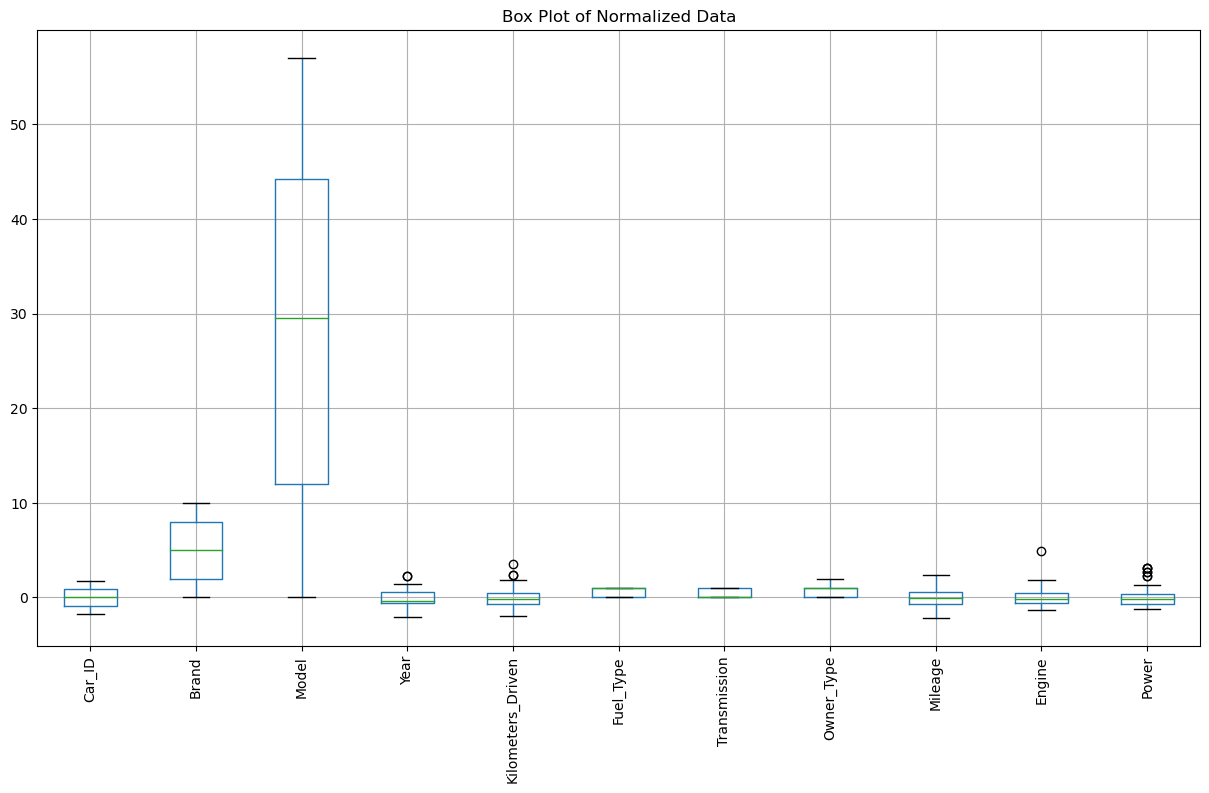

In [8]:
data_normalized_df = pd.DataFrame(data, columns=data.columns[:-2])  # Exclude Geography and binnedInc
data_normalized_df.boxplot(figsize=(15, 8))
plt.xticks(rotation=90)
plt.title("Box Plot of Normalized Data")
plt.show()


In [9]:
X = data.drop(columns=["Price"])
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

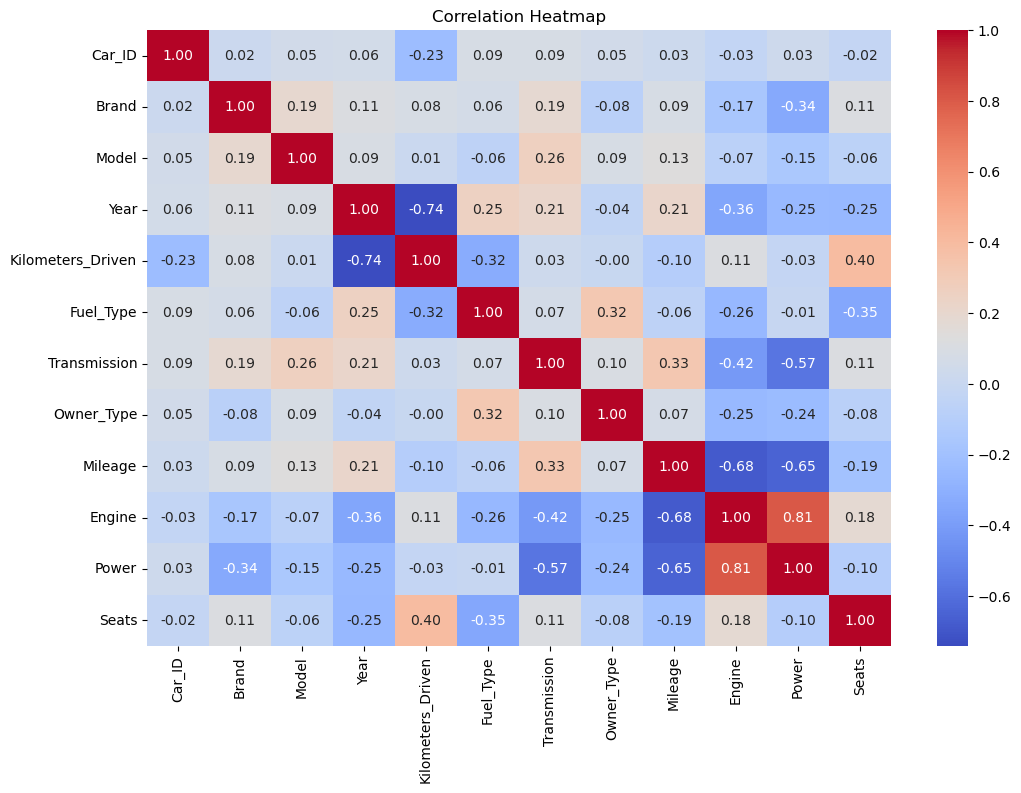

In [13]:
dfx = pd.DataFrame(X, columns=data.columns[:-1]) # Excluding the target column

correlation_matrix = dfx.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [14]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
rmse_linear = mean_squared_error(y_test, y_pred_linear, squared=False)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression RMSE:", rmse_linear)
print("Linear Regression R2 Score:", r2_linear)

Linear Regression RMSE: 0.46501083440882424
Linear Regression R2 Score: 0.7381108607491587


/Users/shivaram/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [15]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)
y_pred_poly = poly_reg.predict(X_test_poly)
rmse_poly = mean_squared_error(y_test, y_pred_poly, squared=False)
r2_poly = r2_score(y_test, y_pred_poly)
print("Polynomial Regression RMSE:", rmse_poly)
print("Polynomial Regression R2 Score:", r2_poly)

Polynomial Regression RMSE: 0.8155567448586417
Polynomial Regression R2 Score: 0.19443662574687348


/Users/shivaram/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [16]:
k = 5  # Choose the number of neighbors
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)
y_pred_knn = knn_reg.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
r2_knn = r2_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Regression RMSE:", rmse_knn)
print("K-Nearest Neighbors Regression R2 Score:", r2_knn)

K-Nearest Neighbors Regression RMSE: 0.6900450073545711
K-Nearest Neighbors Regression R2 Score: 0.4233050070306291


/Users/shivaram/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
voting_regressor = VotingRegressor(estimators=[('linear', linear_reg), ('polynomial', poly_reg), ('KNN', knn_reg)])
voting_regressor.fit(X_train, y_train)
y_pred_voting = voting_regressor.predict(X_test)
rmse_voting = mean_squared_error(y_test, y_pred_voting, squared=False)
r2_voting = r2_score(y_test, y_pred_voting)
print("Voting Regressor RMSE:", rmse_voting)
print("Voting Regressor R2 Score:", r2_voting)

Voting Regressor RMSE: 0.44266708833999635
Voting Regressor R2 Score: 0.7626737304351751


/Users/shivaram/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor RMSE:", rmse_rf)
print("Random Forest Regressor R2 Score:", r2_rf)

Random Forest Regressor RMSE: 0.36567834140602706
Random Forest Regressor R2 Score: 0.8380466925475333


/Users/shivaram/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


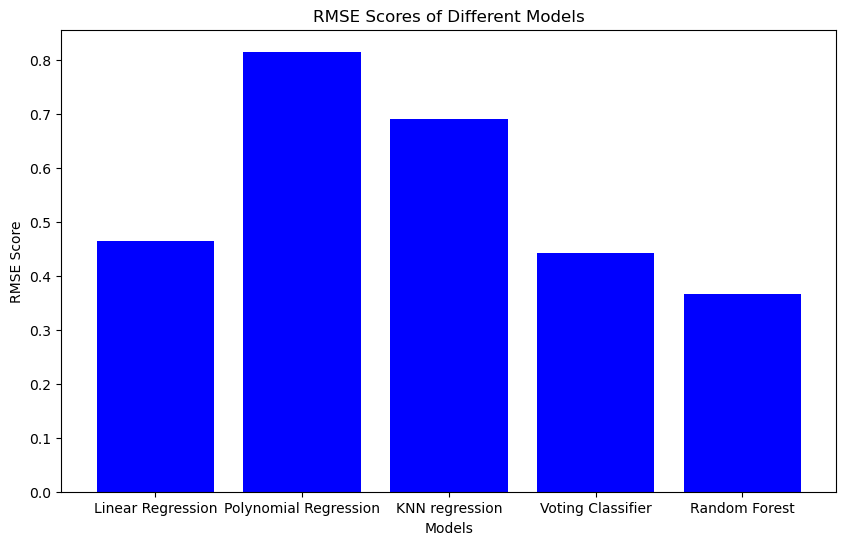

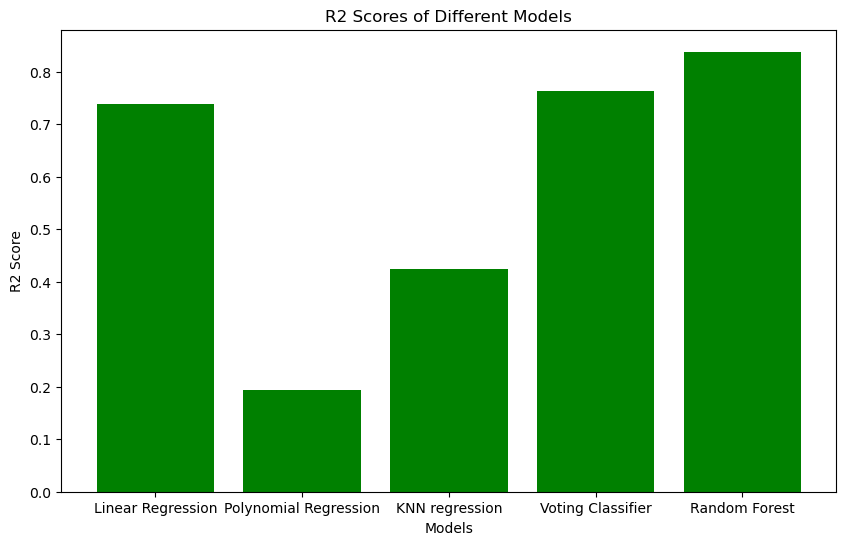

In [19]:
models = ['Linear Regression', 'Polynomial Regression', 'KNN regression', 'Voting Classifier', 'Random Forest']
rmse_scores = [rmse_linear, rmse_poly, rmse_knn, rmse_voting, rmse_rf]
r2_scores = [r2_linear, r2_poly, r2_knn , r2_voting, r2_rf]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color='blue')
plt.xlabel('Models')
plt.ylabel('RMSE Score')
plt.title('RMSE Scores of Different Models')
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color='green')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores of Different Models')
plt.show()
